<a href="https://colab.research.google.com/github/HamorHam/Computer-Vision-Project/blob/main/computervisionproject_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Object Classification Using YOLO <b> </h1></center>

Importing required Libraries

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
# Link to google drive
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset Description






Fruit Images for Object Detection

available on kaggle => https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection


- 240 images in train folder. 60 images in test folder.

- 3 different fruits:

    - Apple

    - Banana

    - Orange

The labels are in xml format, which is Extensible markup language.Storing image dataset labels in XML format is quite common. XML provides a clear, hierarchical structure which is ideal for representing the complex data associated with image labels. This includes not just the class of the object, but potentially a wealth of other information like bounding box coordinates, object IDs, and additional metadata.


# Data Preprocessing

For preprocessing:
- We have to convert the dataset into that acceptable by YOLO.
  - Heirarchy of folders should be the one accepted by YOLO

## Heirarchy of Folders correction

Defining paths to train and test folders.

In [9]:
test_dir = '/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train'
train_dir = '/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val'

The dataset should be labelled by arranging them in the following folders heirarchy.

              root/
              |-- class1/
              |   |-- img1.jpg
              |   |-- img2.jpg
              |   |-- ...
              |
              |-- class2/
              |   |-- img1.jpg
              |   |-- img2.jpg
              |   |-- ...
              |
              |-- class3/
              |   |-- img1.jpg
              |   |-- img2.jpg
              |   |-- ...
              |
              |-- ...

In this folder structure, the root directory contains one subdirectory for each class in the dataset. Each subdirectory is named after the corresponding class and contains all the images for that class.

In [10]:
#set the paths to images directory
image_dir="/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset"

# Custom Classification using YOLO

First install and import

In [11]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/107.7 GB disk)


In [12]:
from ultralytics import YOLO

## Training YOLO

YOLOv8 classification models use the -cls suffix, i.e. yolov8n-cls.pt and are pretrained on ImageNet. See Classification Docs for full details.

In [41]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

The detailed architecture of the model can be seen from:


In [42]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [55]:
%%writefile config.yaml
path: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train
#test: (test dataset folder path)
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val

# Classes
nc: 4 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Hazardous_waste
  1: Non_recyclables
  2: Organic_waste
  3: Recyclables

Overwriting config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [60]:
model.train(data=image_dir,epochs=6,patience=5,batch=8, lr0=0.0005,imgsz=640)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset, epochs=6, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train113, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

train: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... 319 images, 0 corrupt: 100%|██████████| 319/319 [00:00<?, ?it/s]
val: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train113
Starting training for 6 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]

                   all       0.65          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all      0.788          1



6 epochs completed in 0.033 hours.
Optimizer stripped from runs/classify/train113/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train113/weights/best.pt, 3.0MB

Validating runs/classify/train113/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... found 319 images in 4 classes ✅ 
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... found 80 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]


                   all      0.788          1
Speed: 1.4ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train113


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1aad9c5240>
curves: []
curves_results: []
fitness: 0.893750011920929
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7875000238418579, 'metrics/accuracy_top5': 1.0, 'fitness': 0.893750011920929}
save_dir: PosixPath('runs/classify/train113')
speed: {'preprocess': 1.3915151357650757, 'inference': 1.9395500421524048, 'loss': 0.0008642673492431641, 'postprocess': 0.0007390975952148438}
task: 'classify'
top1: 0.7875000238418579
top5: 1.0

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [63]:
# metrics = model.val()  # no arguments needed, dataset and settings remembered
# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75
# metrics.box.maps   # a list contains map50-95 of each category
# metrics.box.mp    # P
# metrics.box.mr    # R

# Get the resut for classification model
metrics = model.val()  # Run validation on the classification model

# Access top-1 and top-5 accuracy for classification
print("Top-1 Accuracy:", metrics.top1)  # top-1 accuracy
print("Top-5 Accuracy:", metrics.top5)  # top-5 accuracy

# Access additional information if needed
print("Speed per image:", metrics.speed)  # Speed details for preprocess, inference, etc.
print("Model fitness:", metrics.fitness)  # Fitness, which is equal to top-5 accuracy


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... found 319 images in 4 classes ✅ 
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... found 80 images in 4 classes ✅ 
test: None...


val: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 10/10 [00:02<00:00,  4.63it/s]


                   all      0.775          1
Speed: 0.6ms preprocess, 3.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train1133
Top-1 Accuracy: 0.7749999761581421
Top-5 Accuracy: 1.0
Speed per image: {'preprocess': 0.6228387355804443, 'inference': 3.2310545444488525, 'loss': 0.0019162893295288086, 'postprocess': 0.0020116567611694336}
Model fitness: 0.887499988079071


Showing confusion matrix, that is already stored in detect/train folder

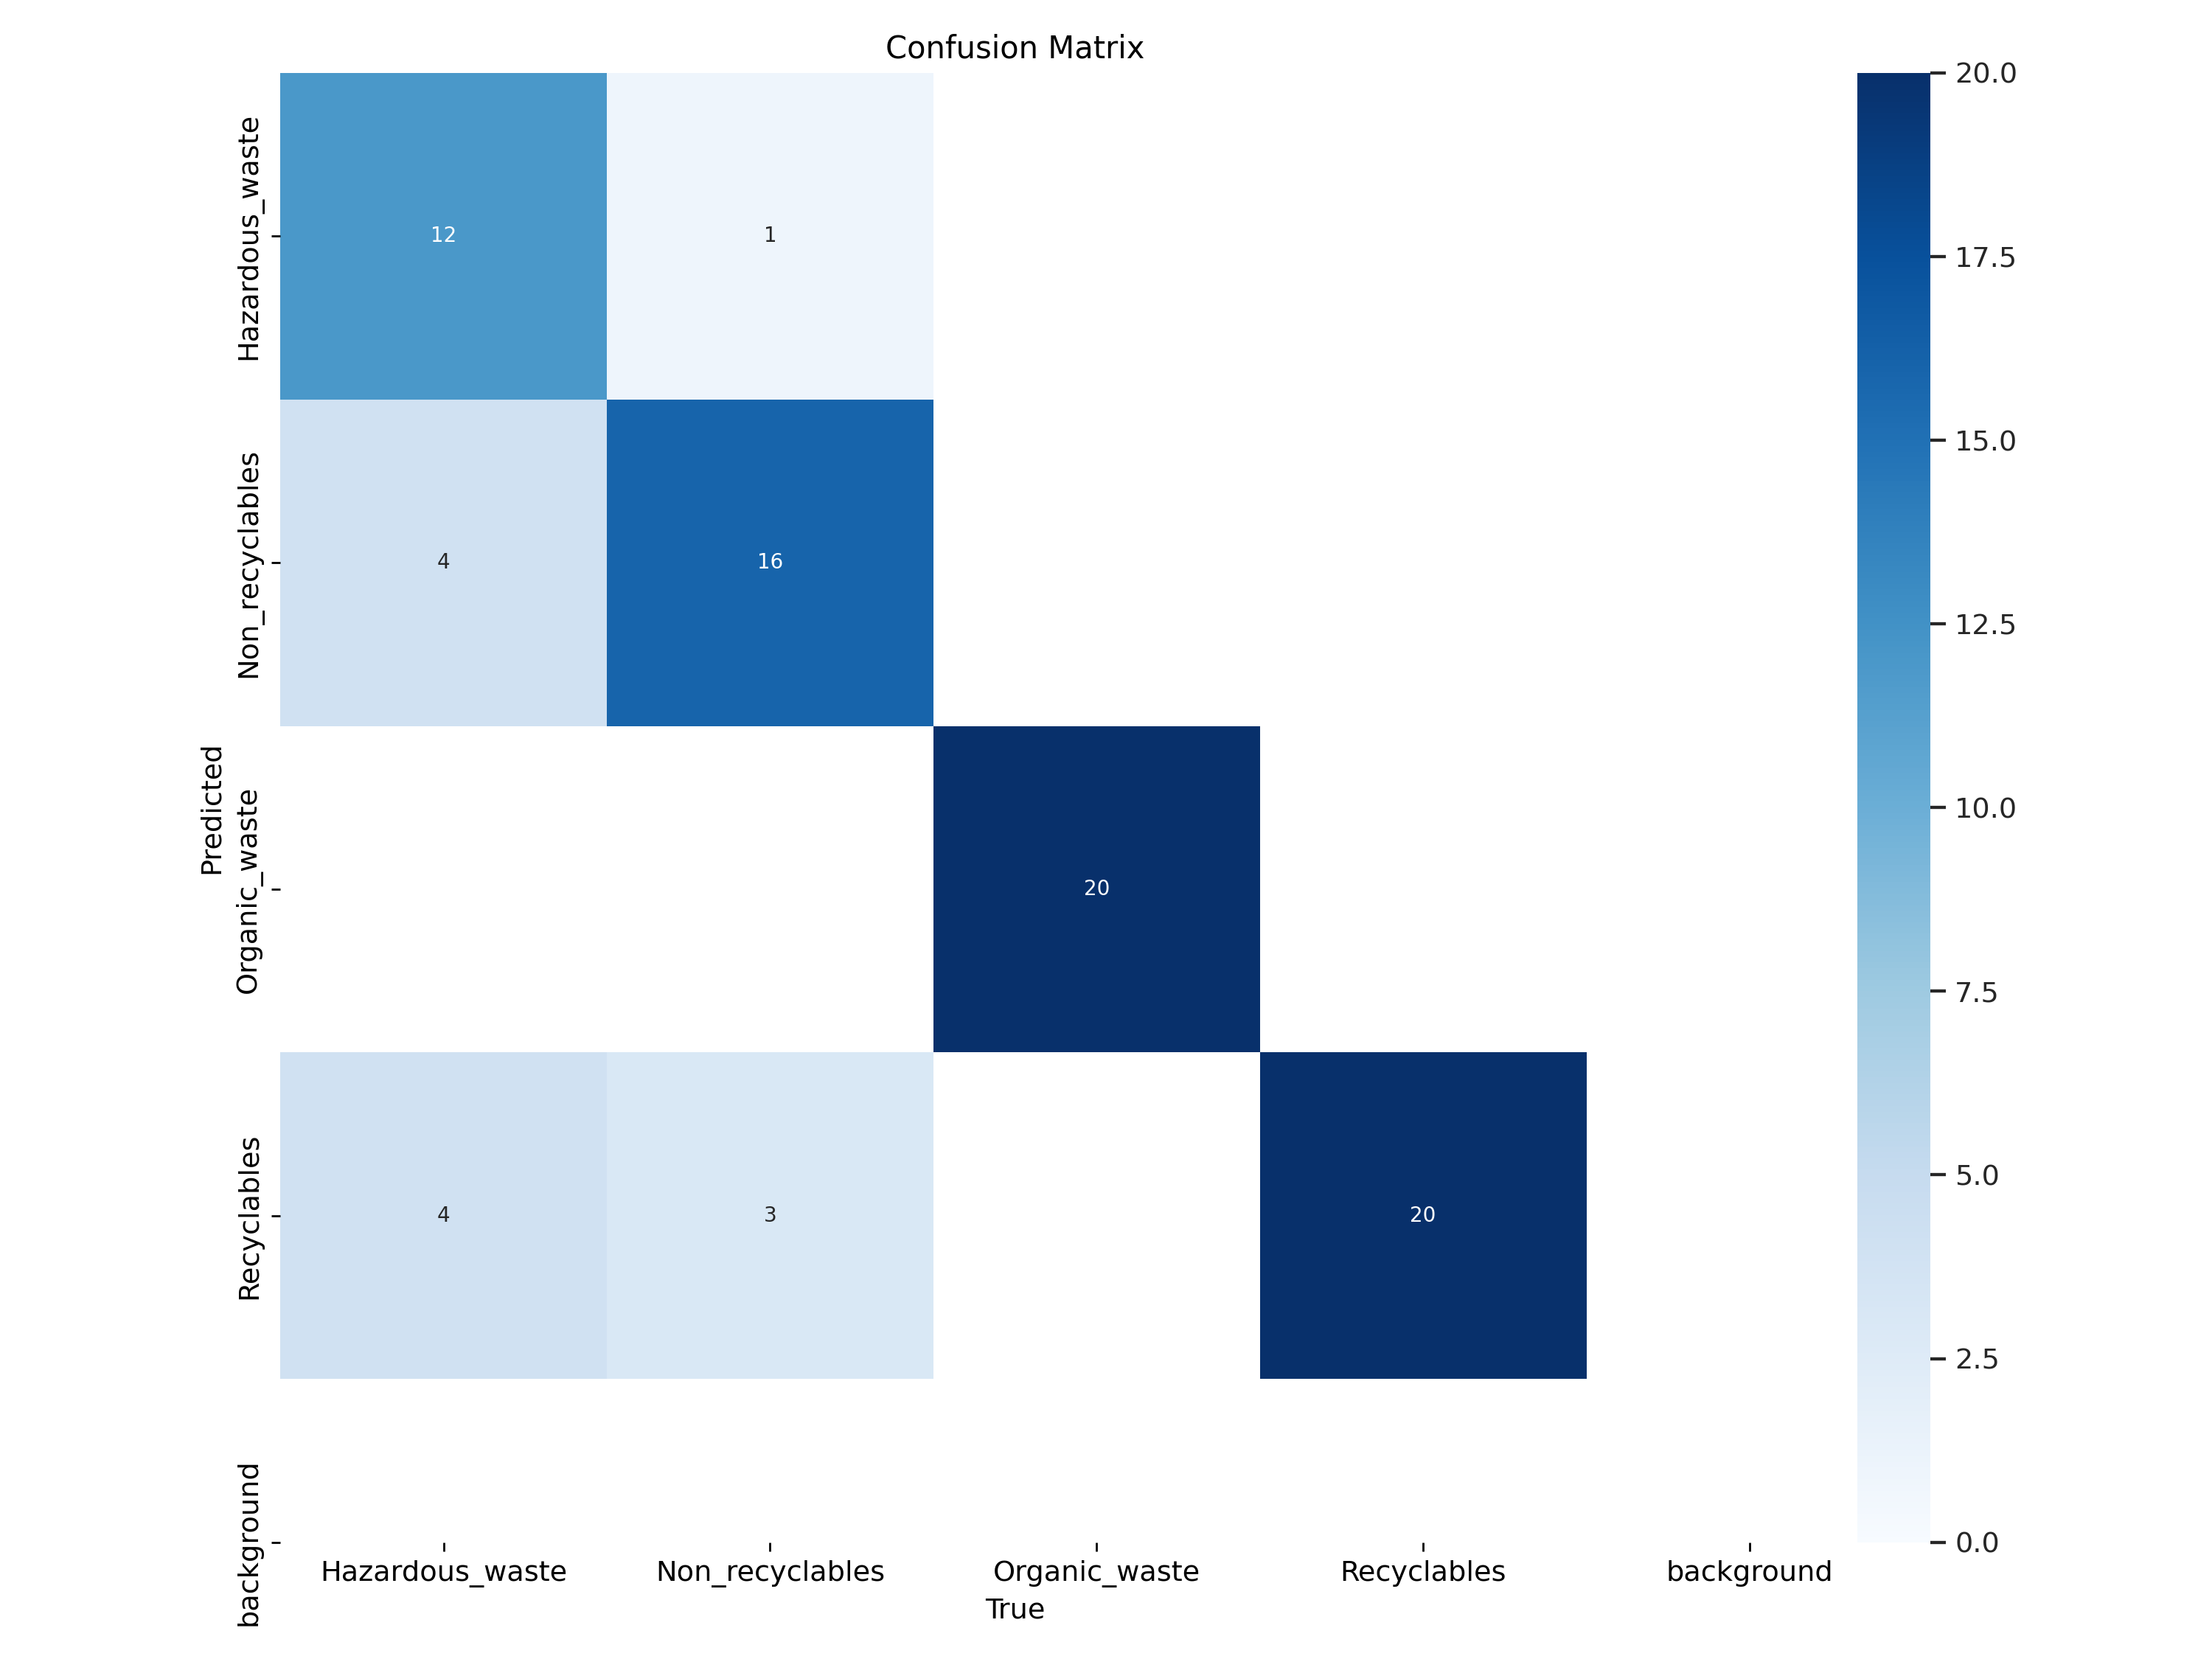

In [69]:
%matplotlib inline
from PIL import Image
# Display the confusion matrix

Image.open('/content/runs/classify/train11/confusion_matrix.png')

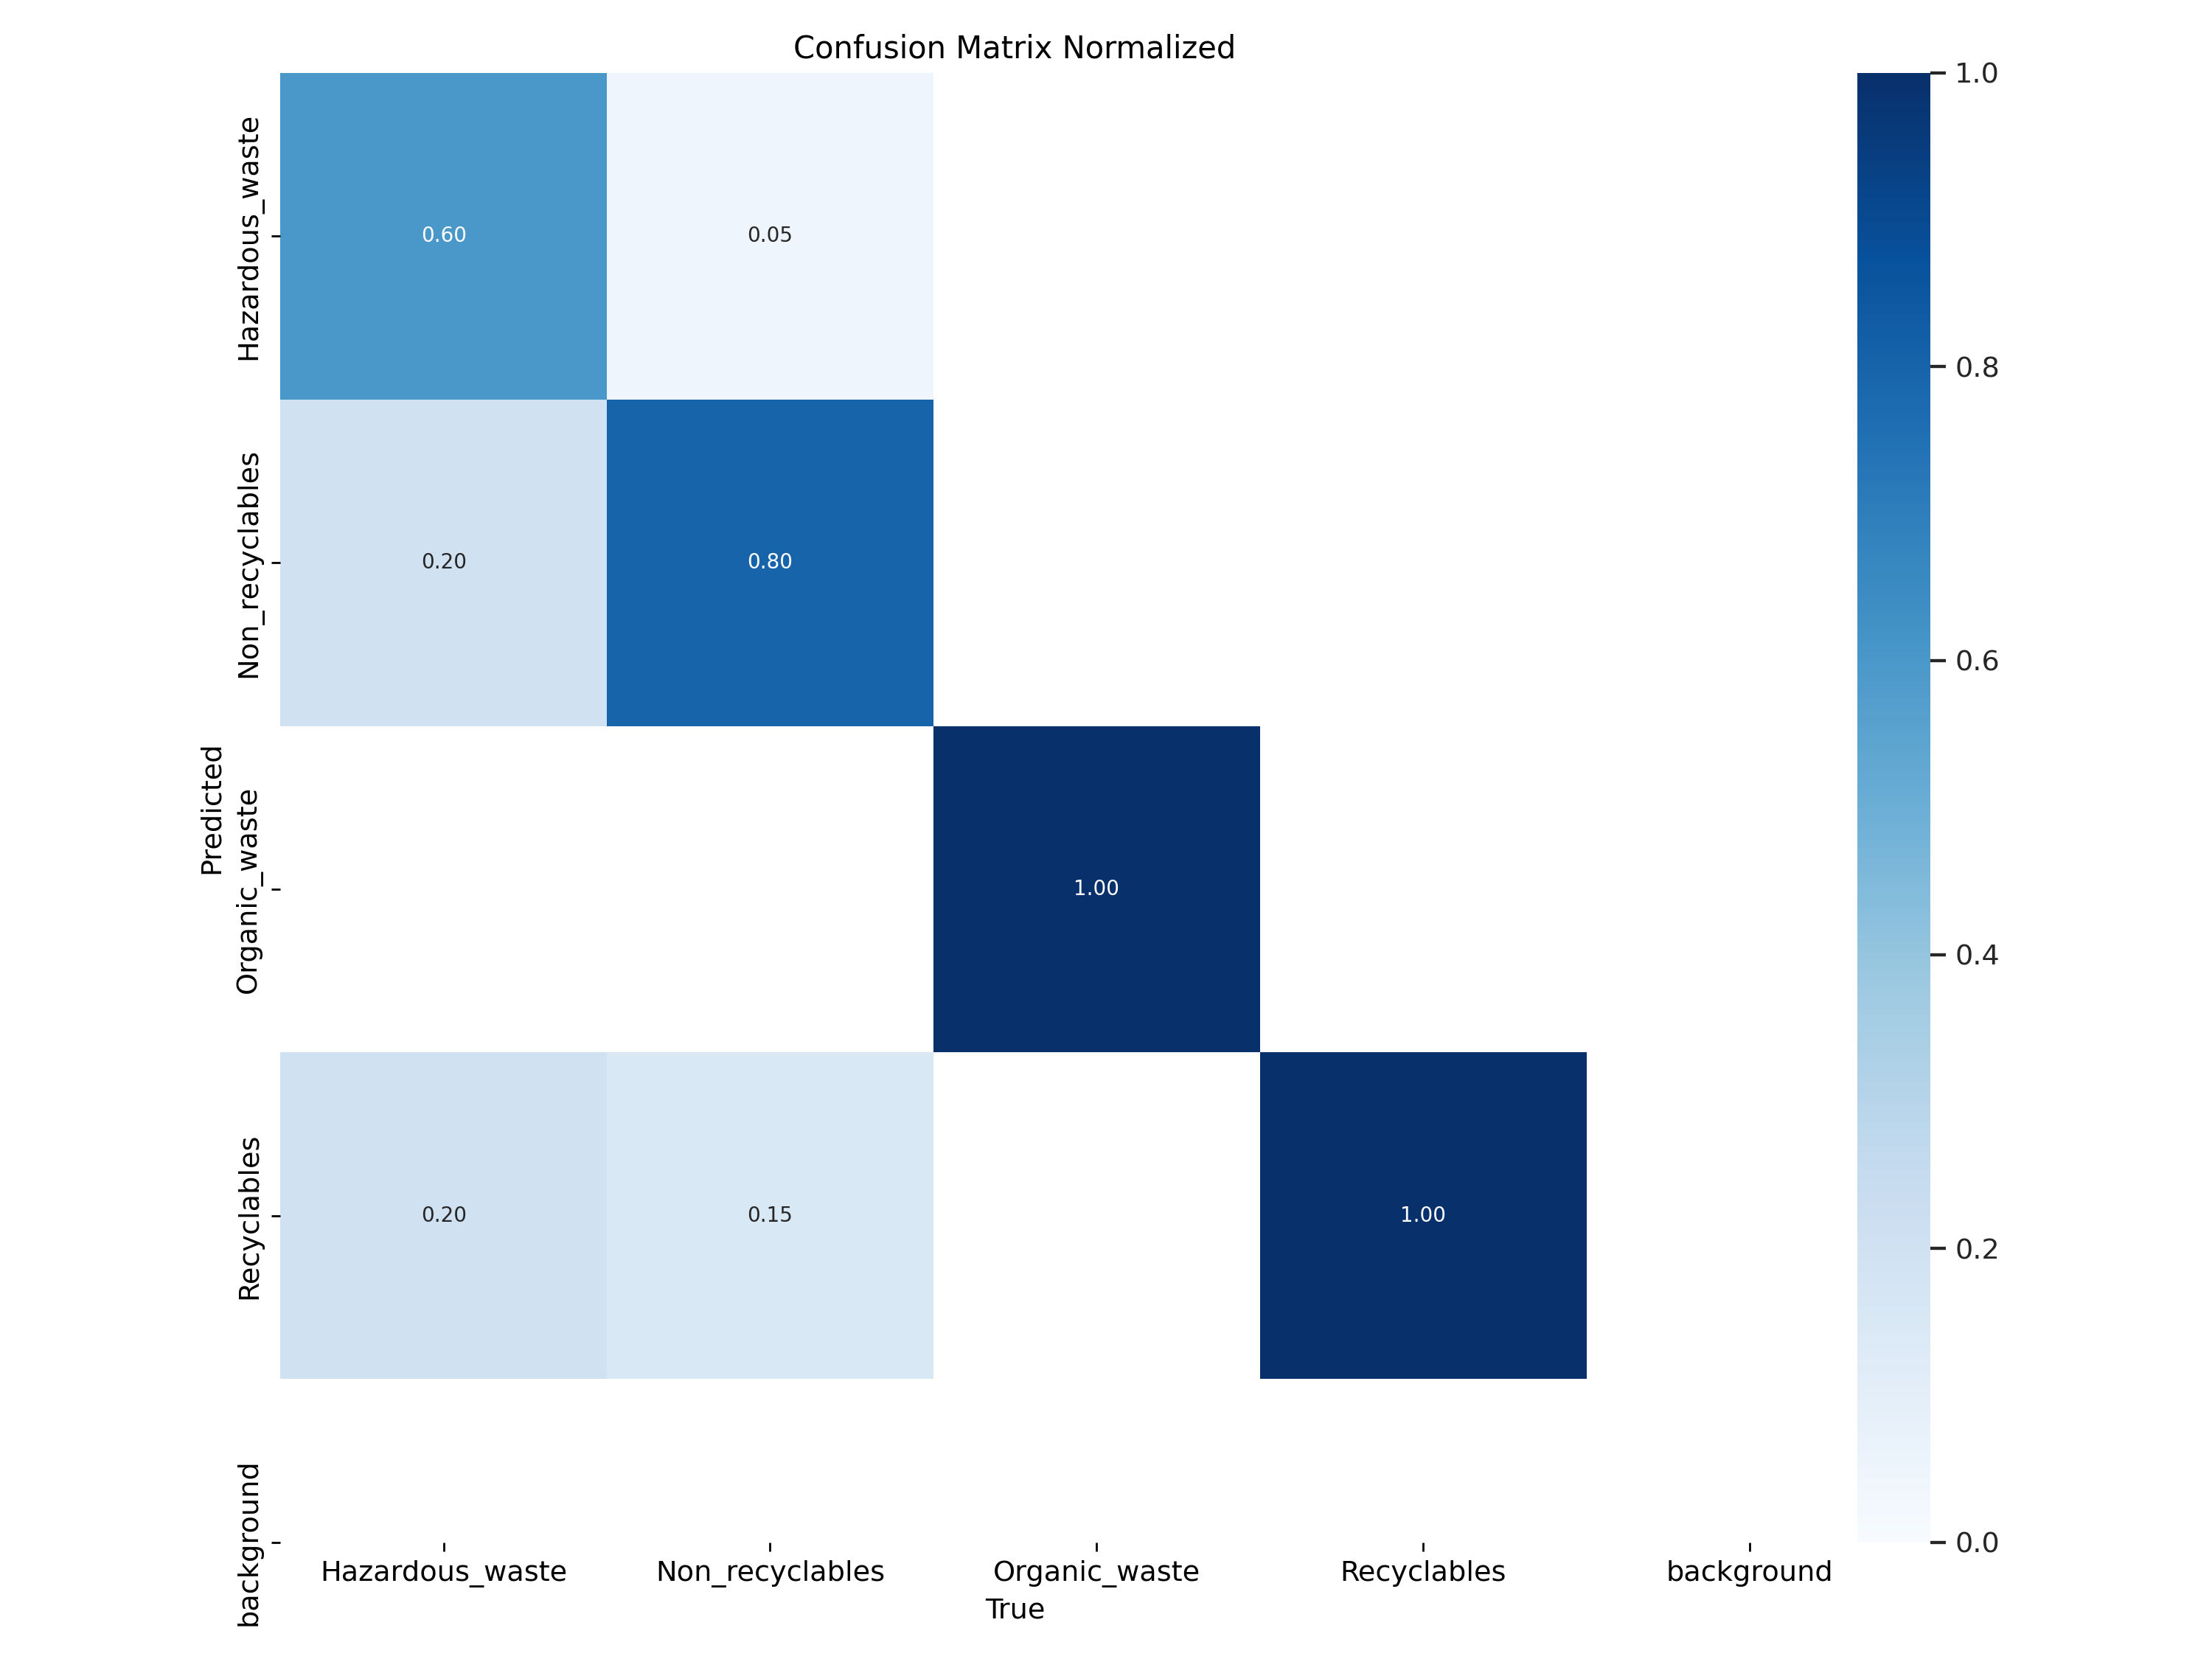

In [70]:
%matplotlib inline
from PIL import Image
# Display the normalized confusion matrix

Image.open('/content/runs/classify/train11/confusion_matrix_normalized.png')

##Prediction

In [76]:
model = YOLO('/content/runs/classify/train11/weights/best.pt' )  # load a custom model

# Predict with the model with any image from internet?
results = model('https://greencitizen.com/wp-content/uploads/2023/03/paper-towel-waste.jpg', save=True)

100%|██████████| 41.5k/41.5k [00:00<00:00, 351kB/s]

image 1/1 /content/paper-towel-waste.jpg: 640x640 Hazardous_waste 0.55, Organic_waste 0.24, Non_recyclables 0.14, Recyclables 0.07, 3.5ms
Speed: 20.8ms preprocess, 3.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict3


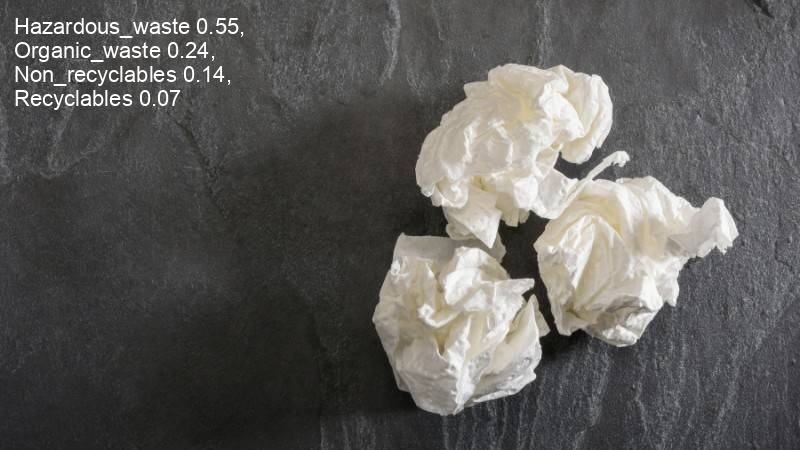

In [77]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/predict3/paper-towel-waste.jpg')

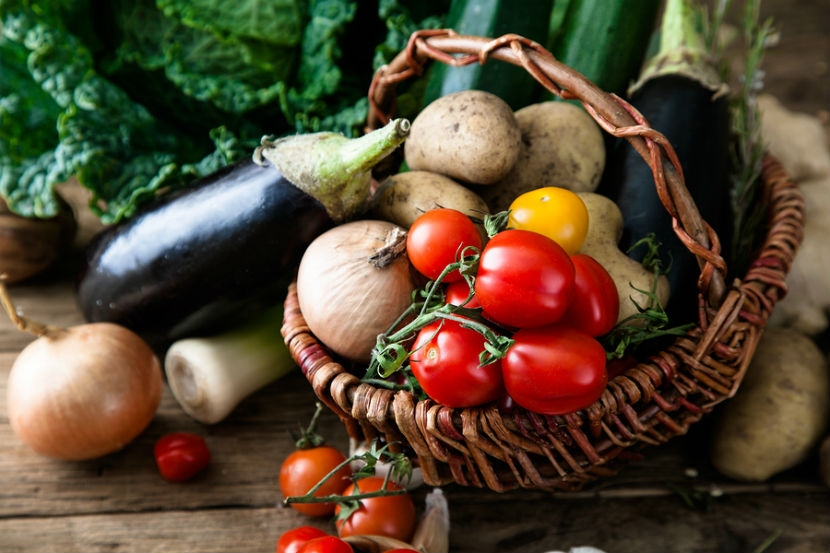

In [79]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/Organic-food-v-2-resized.jpg')

In [ ]:
# Save the results
!scp -r /content/runs '/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject'

## Changed YOLO Model

YOLOv8 classification models use the -cls suffix, i.e. yolov8n-cls.pt and are pretrained on ImageNet. See Classification Docs for full details.

In [13]:
model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model

The detailed architecture of the model can be seen from:


In [14]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [15]:
%%writefile config.yaml
path: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train
#test: (test dataset folder path)
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val

# Classes
nc: 4 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Hazardous_waste
  1: Non_recyclables
  2: Organic_waste
  3: Recyclables

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [16]:
model.train(data=image_dir,epochs=6,patience=5,batch=8, lr0=0.001,imgsz=640)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset, epochs=6, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... 319 images, 0 corrupt: 100%|██████████| 319/319 [00:00<?, ?it/s]
val: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 6 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/6         0G      1.417          8        640:   2%|▎         | 1/40 [00:07<04:46,  7.35s/it]


100%|██████████| 755k/755k [00:00<00:00, 12.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:31<00:00,  6.39s/it]

                   all      0.625          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:14<00:00,  2.92s/it]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:13<00:00,  2.69s/it]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:14<00:00,  2.90s/it]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:14<00:00,  2.80s/it]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:13<00:00,  2.62s/it]

                   all      0.837          1



6 epochs completed in 0.286 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1,440,004 parameters, 0 gradients, 3.3 GFLOPs
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... found 319 images in 4 classes ✅ 
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... found 80 images in 4 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:14<00:00,  2.91s/it]


                   all      0.837          1
Speed: 0.0ms preprocess, 141.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b82f1f700a0>
curves: []
curves_results: []
fitness: 0.918749988079071
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8374999761581421, 'metrics/accuracy_top5': 1.0, 'fitness': 0.918749988079071}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0028908252716064453, 'inference': 141.85580015182495, 'loss': 0.0001817941665649414, 'postprocess': 0.00014901161193847656}
task: 'classify'
top1: 0.8374999761581421
top5: 1.0

## Evaluation Metrics

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [31]:
# metrics = model.val()  # no arguments needed, dataset and settings remembered
# metrics.box.map    # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75
# metrics.box.maps   # a list contains map50-95 of each category
# metrics.box.mp    # P
# metrics.box.mr    # R

# Get the resut for classification model
metrics = model.val()  # Run validation on the classification model

# Access top-1 and top-5 accuracy for classification
print("Top-1 Accuracy:", metrics.top1)  # top-1 accuracy
print("Top-5 Accuracy:", metrics.top5)  # top-5 accuracy

# Access additional information if needed
print("Speed per image:", metrics.speed)  # Speed details for preprocess, inference, etc.
print("Model fitness:", metrics.fitness)  # Fitness, which is equal to top-5 accuracy


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
train: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/train... found 319 images in 4 classes ✅ 
val: /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... found 80 images in 4 classes ✅ 
test: None...


val: Scanning /content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/CV_Dataset/val... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 5/5 [00:12<00:00,  2.55s/it]


                   all      0.837          1
Speed: 0.0ms preprocess, 119.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val5
Top-1 Accuracy: 0.8374999761581421
Top-5 Accuracy: 1.0
Speed per image: {'preprocess': 0.001665949821472168, 'inference': 119.15782690048218, 'loss': 0.0004202127456665039, 'postprocess': 0.0001728534698486328}
Model fitness: 0.918749988079071


Showing confusion matrix, that is already stored in detect/train folder

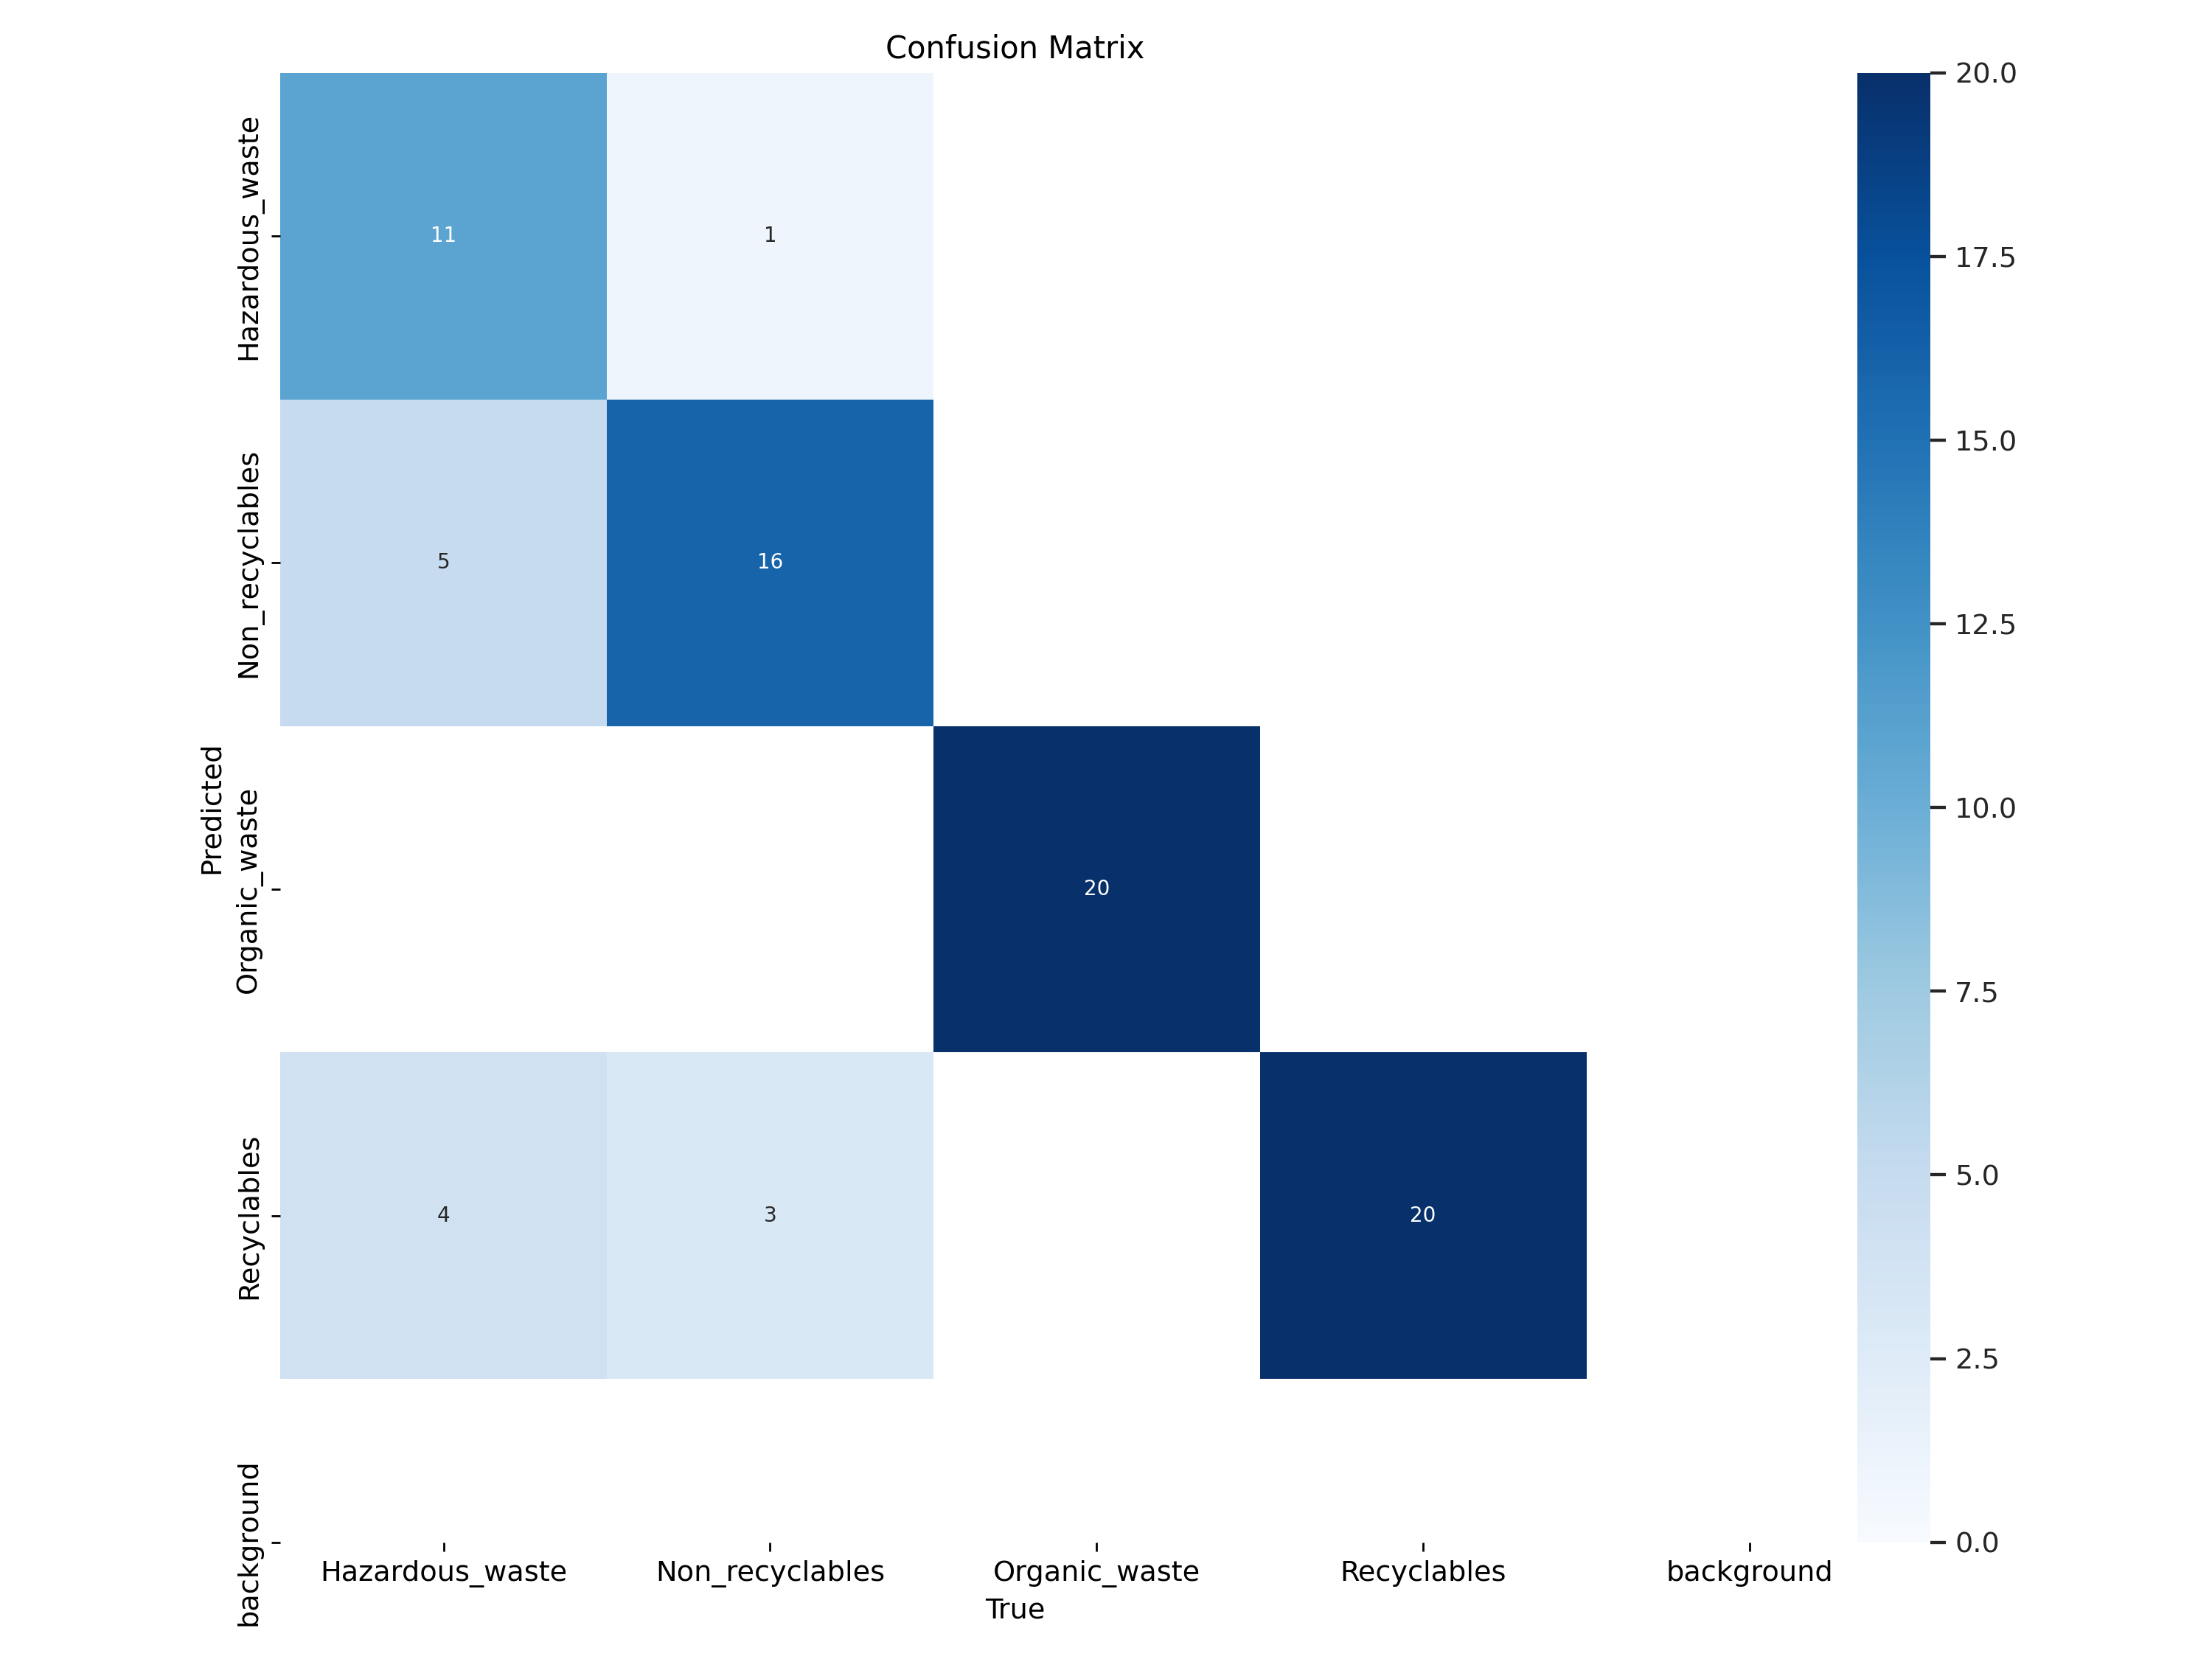

In [18]:
%matplotlib inline
from PIL import Image
# Display the confusion matrix

Image.open('/content/runs/classify/train/confusion_matrix.png')

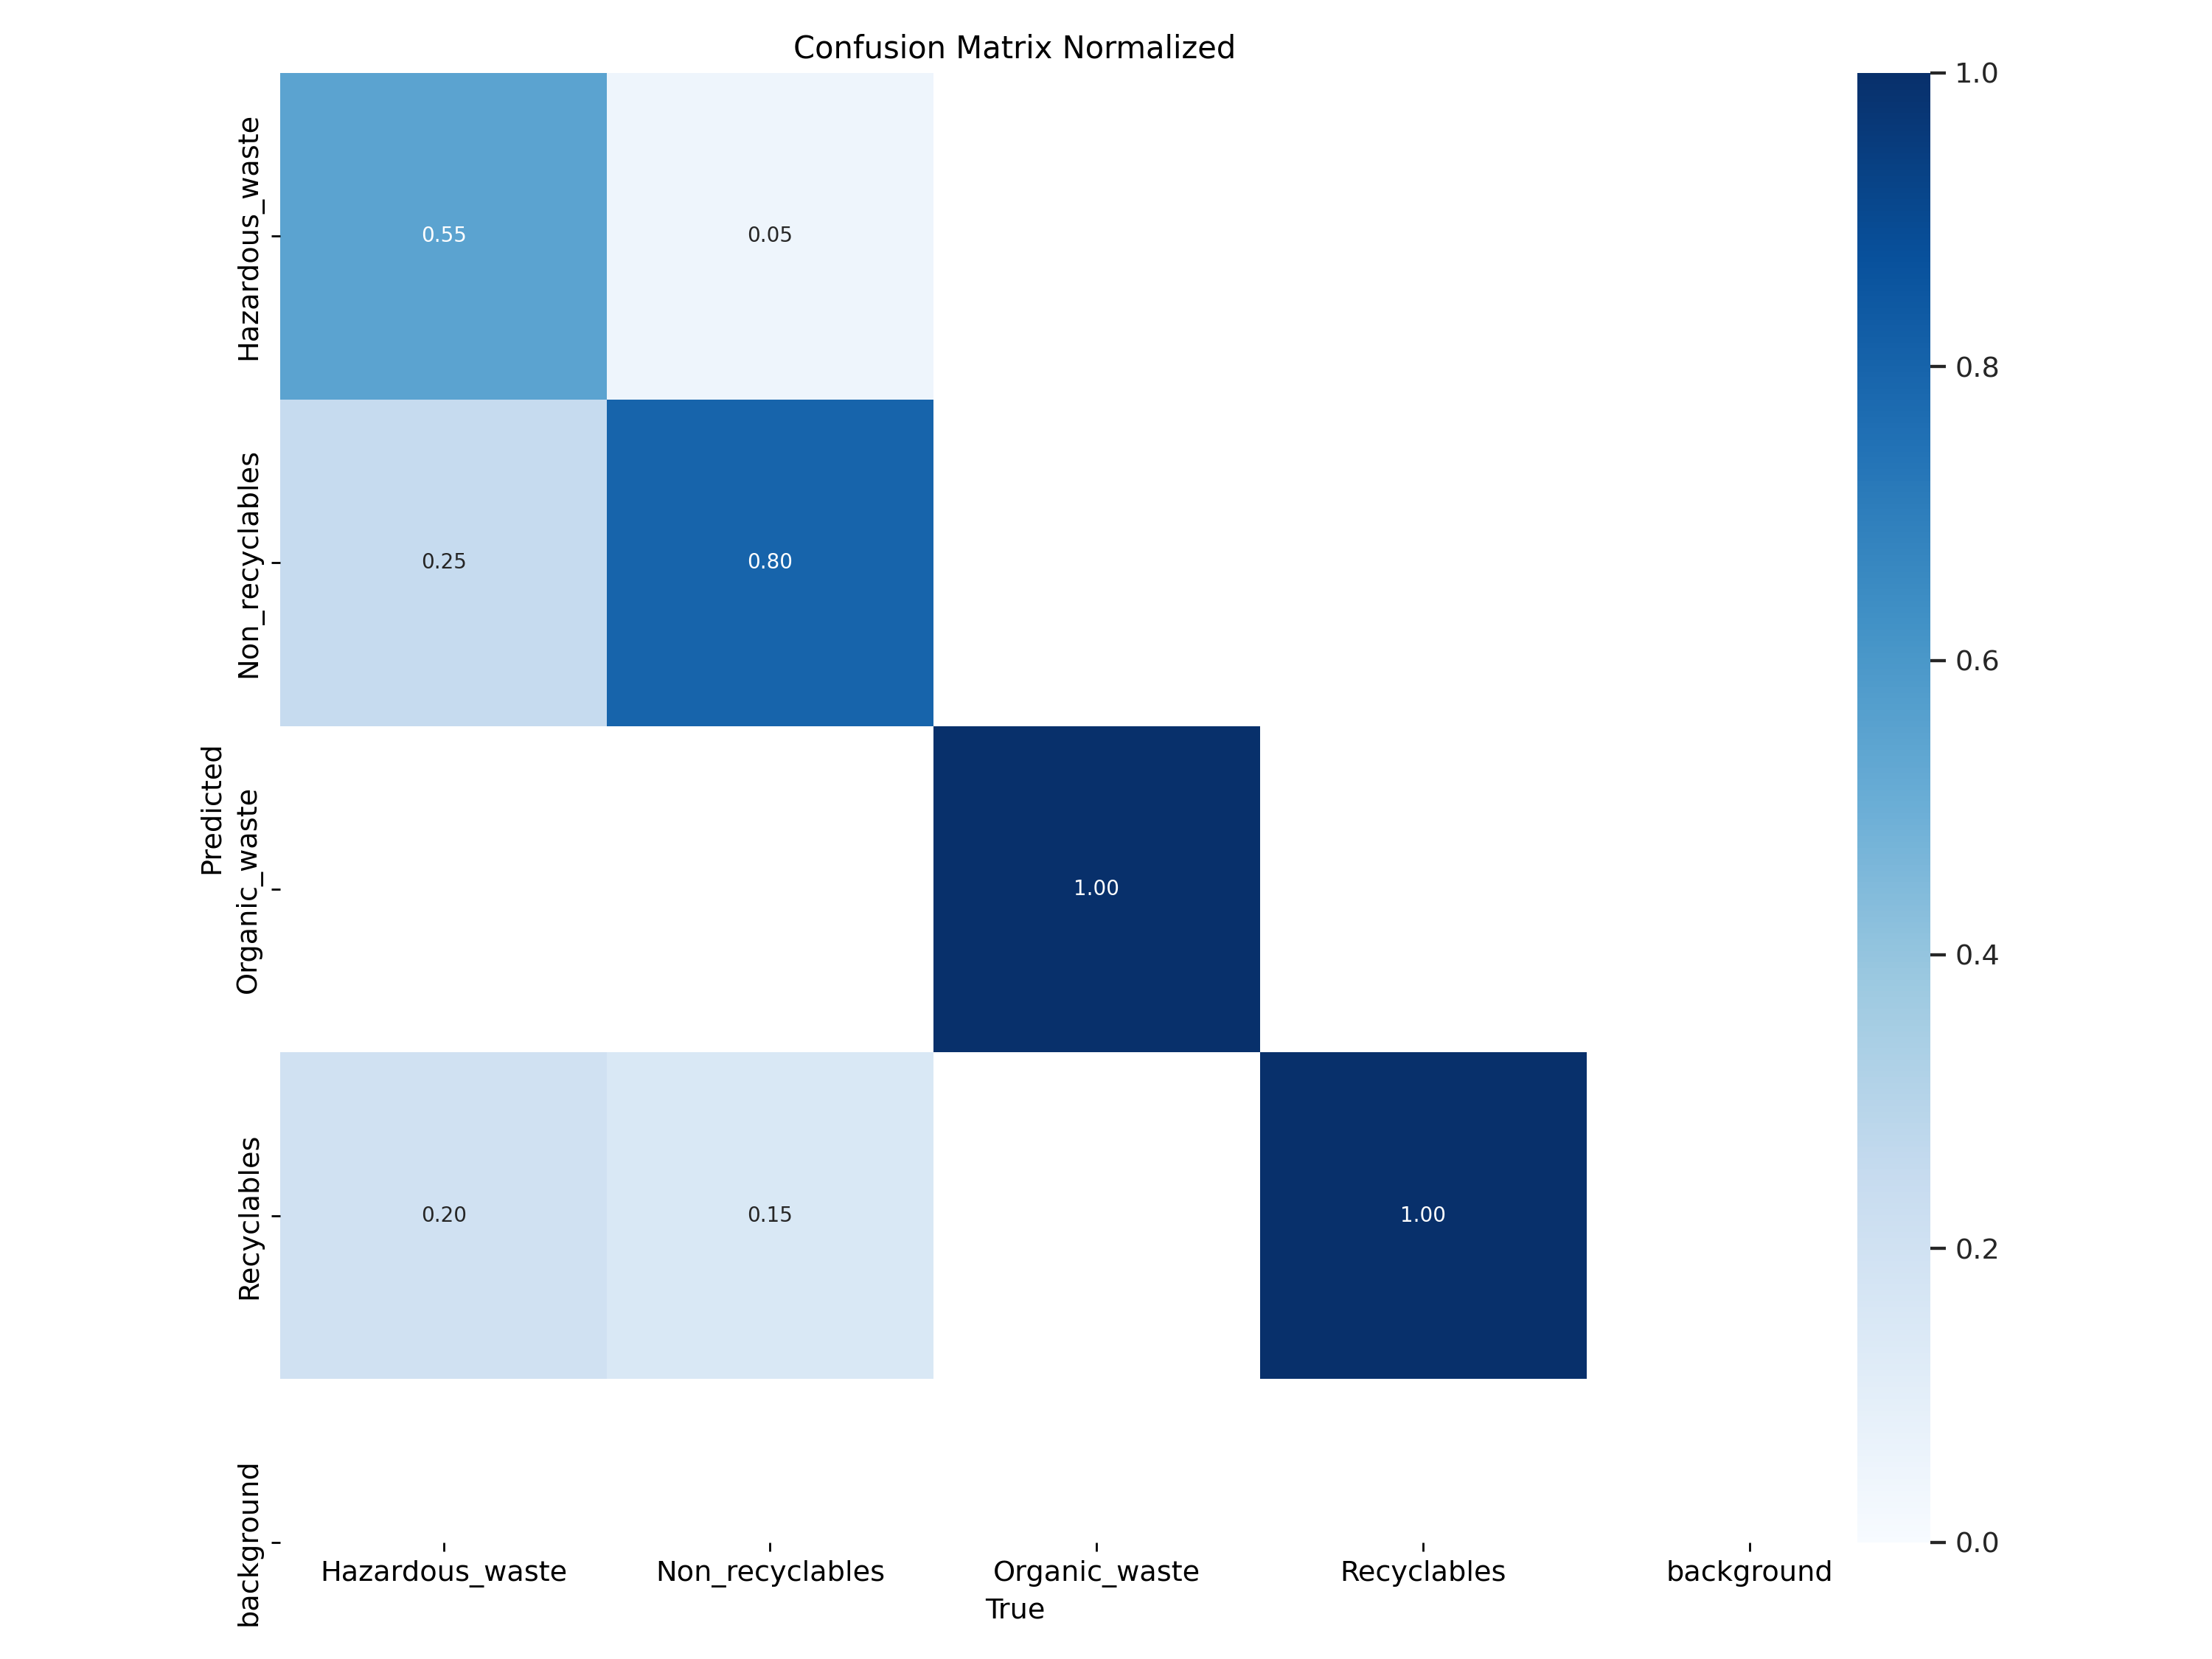

In [19]:
%matplotlib inline
from PIL import Image
# Display the normalized confusion matrix

Image.open('/content/runs/classify/train/confusion_matrix_normalized.png')

##Prediction

In [24]:
model = YOLO('/content/runs/classify/train/weights/best.pt' )  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.unlockfood.ca/EatRightOntario/media/Website-images-resized/Organic-food-v-2-resized.jpg', save=True)

100%|██████████| 103k/103k [00:00<00:00, 1.83MB/s]


image 1/1 /content/Organic-food-v-2-resized.jpg: 640x640 Organic_waste 0.96, Non_recyclables 0.02, Recyclables 0.01, Hazardous_waste 0.01, 149.7ms
Speed: 39.4ms preprocess, 149.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2


In [22]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/predict/paper-towel-waste.jpg')

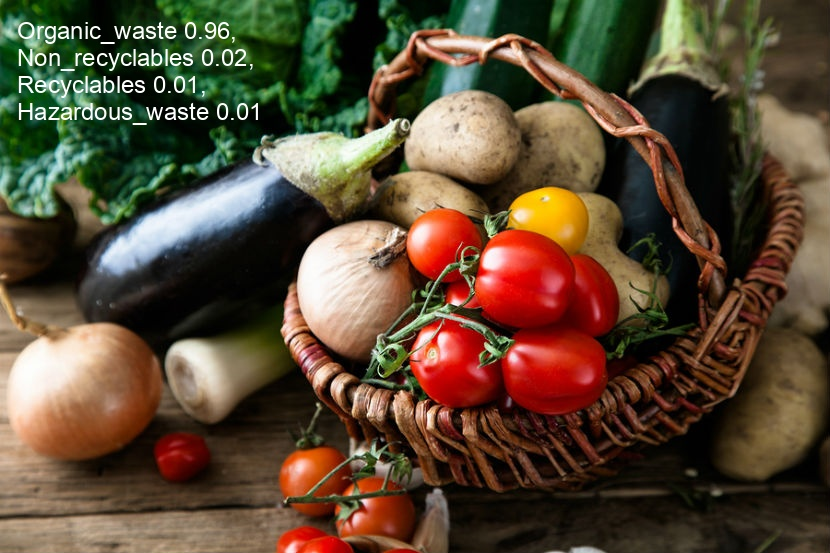

In [25]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/predict2/Organic-food-v-2-resized.jpg')

In [26]:
# Save the results
!scp -r /content/runs '/content/gdrive/MyDrive/IAT/IAT_360/ComputerVisionProject/Changed'